# INF-0616 - Projeto 3: Redes neurais

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- a229999@dac.unicamp.br
           Hudson Bruno -- hudson.bruno@ic.unicamp.br 

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=456)

Download do dataset: [download dataset customer-issues](https://ic.unicamp.br/~esther/customer-issues.csv)


Instituto de Computação - Unicamp 2020

**Membros** <br>
André de Souza Gonçalves <br>
Victor Teodoro Goraieb <br>
Vitor Anastácio 


In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   42G   37G  54% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  821M  59% /sbin/docker-init
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        86G   47G   40G  54% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [3]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:        10666796 kB
MemAvailable:   12456108 kB
Buffers:          124952 kB
Cached:          1818824 kB
SwapCached:            0 kB
Active:           973088 kB
Inactive:        1403352 kB
Active(anon):     401004 kB
Inactive(anon):      472 kB
Active(file):     572084 kB
Inactive(file):  1402880 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               180 kB
Writeback:             0 kB
AnonPages:        432692 kB
Mapped:           239824 kB
Shmem:              1196 kB
KReclaimable:     111644 kB
Slab:             159092 kB
SReclaimable:     111644 kB
SUnreclaim:        47448 kB
KernelStack:        4944 kB
PageTables:         5964 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3078080 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       44972 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.random.seed(12049)

plt.rcParams['figure.figsize'] = (12, 6)

#### Lendo o conjunto de dados

O conjunto de dados consiste em reclamações de clientes a cerca de produtos/serviços oferecidos em uma instituição bancária. ***Garanta que o arquivo*** `customer-issues.csv` ***está no mesmo diretório do notebook***.

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/MDC - Trabalhos/INF-0616-010 - Aprendizado de Máquina Supervisionado II/Trabalho 3/customer-issues.csv')
display(d.head())

,date-received,product,sub-product,issue,sub-issue,consumer-message,state,zip-code,tags,via,resolution,timely-response?,disputed?,complaint-id
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,AL,352XX,NaN,Web,Closed with explanation,Yes,No,2141773
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,PA,177XX,Older American,Web,Closed with explanation,Yes,No,2163100
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,VA,224XX,NaN,Web,Closed with explanation,Yes,No,1420702
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,TX,752XX,NaN,Web,Closed with explanation,Yes,Yes,1772196
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,NE,693XX,NaN,Web,Closed with explanation,Yes,Yes,1790634


##### Exibindo as quatro primeiras mensagens

In [ ]:
print(*d.loc[:4, 'consumer-message'], sep='\n\n')

I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements

I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had b

##### Extraíndo um conjunto de testes válido

As mensagens contidas neste conjunto possuem uma relação temporal.
É importante realizar a separação dos sub-conjuntos de treino/teste respeitando esta relação, de forma a garantir que o modelo não seja treinado sobre amostras no futuro e experimentado sobre o passado.

In [ ]:
d.sort_values(by='date-received', inplace=True)

### Modelando a classificação de tópicos baseado nas mensagens de clientes

Observando no gráfico de frequências de produto sobre as conversas que este é um problema extremamente desbalanceado. Há, entretanto, amostras suficientes para a modelagem de um estimador de tópico (de produto) levando em consideração o diálogo do cliente.

In [ ]:
def frequencies(dataset, column):
    labels, counts = np.unique(dataset[column], return_counts=True)
    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]
    
    (sns
     .barplot([l[:40] for l in labels], counts)
     .set_title(f'Occurrences for The {len(labels)} Classes in {column}'))
    plt.xticks(rotation=90)
    
    return labels, counts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


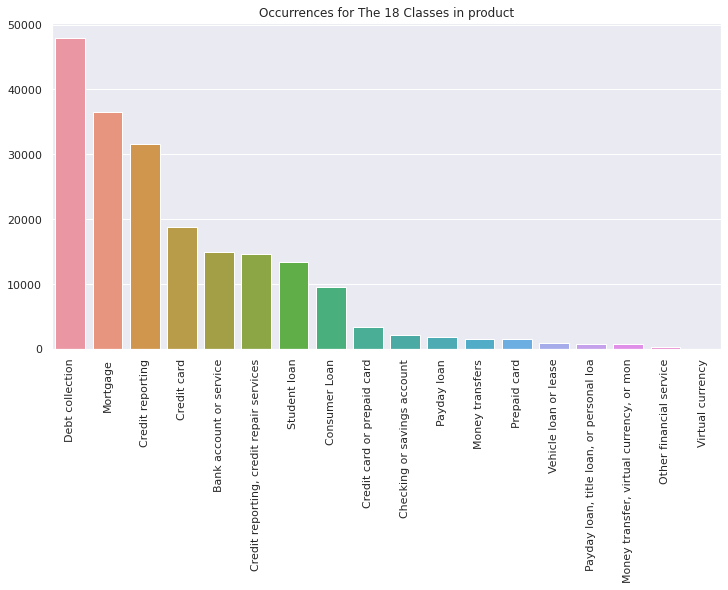

In [ ]:
labels, counamts = frequencies(d, 'product')

Simplificamos o problema, considerando somente as 6 classes mais frequentes:

In [ ]:
s = d['product'].isin(labels[:6])
d = d[s]

test_share = .3

d_train, d_test = train_test_split(d, test_size=test_share, shuffle=False)
assert d_train['date-received'].max() <= d_test['date-received'].min()

x_train, x_test = d_train['consumer-message'], d_test['consumer-message']
y_train, y_test = d_train['product'], d_test['product']

Vamos codificar as palavras na conversa utilizando o TF-IDF, gerando um vetor de características baseadas nas frequências de ocorrência das palavras no documento e em todo o conjunto de dados.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

features = 1024

encoder = make_pipeline(TfidfVectorizer(min_df=5,
                                        stop_words='english',
                                        strip_accents='unicode',
                                        max_features=features),
                        StandardScaler(with_mean=False))

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

label_enc = LabelEncoder()
ye_train = label_enc.fit_transform(y_train)
ye_test = label_enc.transform(y_test)

## Treinando um regressor logístico para classificar produto
**Atividade (1 pt):** treine um regressor logístico, buscando os hiper-parâmetros com *grid-search*.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_reg = LogisticRegression(random_state=42, n_jobs=-1)

grid = {
    'C': [0.1, 1.0, 10.0],
    'max_iter': [100, 1000, 10000],
    'class_weight': [None , 'balanced']
}

grid_search = GridSearchCV(estimator = logistic_reg, param_grid = grid, cv = 2, scoring = 'balanced_accuracy', verbose = 5)


In [ ]:
# EXECUÇÃO DO GRID SEARCH (DEMORA ~15 MIN, NÃO PRECISA RODAR JÁ QUE SALVAMOS OS MELHORES PARÂMETROS ABAIXO)
#grid_search.fit(x_train, ye_train)
#best_lr = grid_search.best_estimator_
#best_params = grid_search.best_params_

In [ ]:
# Como uma forma de tornar esse resultado reprodutível, salvamos os melhores parâmetros na variáveis best_params_resultado e treinamos um novo modelo com base nesses valores (RODAR CASO NÃO TENHA FEITO O GRID SEARCH)
best_params_resultado = {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100}
best_lr = LogisticRegression(random_state=42, **best_params_resultado)
best_lr.fit(x_train, ye_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Iremos calcular a matriz de confusão relativa $R$, que guarda porcentagens de incidências em vez das contagens absolutas, e plotar o heatmap dessa matriz. Além disso, iremos calcular a distribuição de confiança nas predições por classe (mais próximos de `1.0` --> mais confiante):

In [ ]:
def evaluate(y, p, probabilities, labels=None):
    # Cálculo das métricas de acerto.
    print('Accuracy:', metrics.accuracy_score(y, p).round(3))
    print('Accuracy (balanced):', metrics.balanced_accuracy_score(y, p).round(3))
    
    # Calculo da matriz de confusão.
    c = metrics.confusion_matrix(y, p)
    r = c / c.sum(axis=1, keepdims=True)
    
    # Impressão dos gráficos.
    (plt
     .figure(figsize=(16, 12))
     .suptitle('Matriz de confusão', fontsize=20))
    sns.heatmap(r,
                cmap="YlGnBu", linewidths=.5, annot=True, fmt=".1%",
                xticklabels=labels, yticklabels=labels, cbar=False)

    (plt
     .figure(figsize=(16, 12))
     .suptitle('Distribuição de confiança para cada classe', fontsize=20))
    
    for i in np.unique(y):
        # Para cada classe `i`, seleciona suas amostras e filtra a confiança
        # do modelo em predizer estas amostras como sendo da classe `i`.
        sns.distplot(probabilities[y.ravel() == i][:, i],
                     hist=False,
                     label=labels[i])

Vamos utilizar a função `evaluate` para avaliar o modelo treinado anteriormente:

Accuracy: 0.754
Accuracy (balanced): 0.747


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

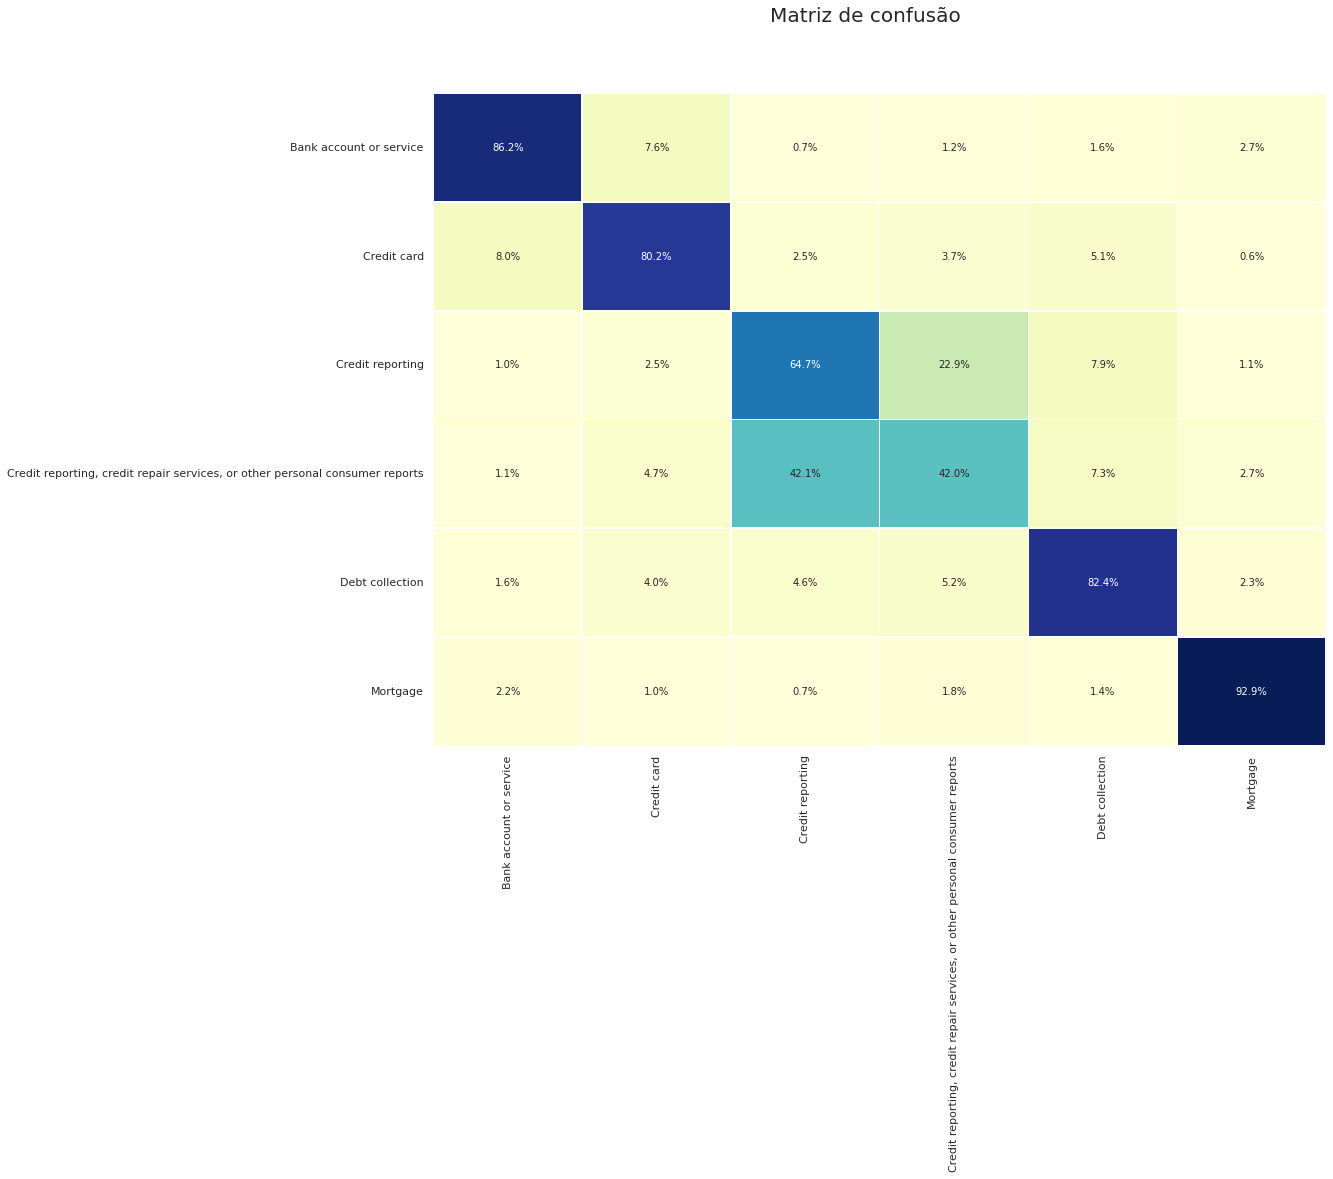

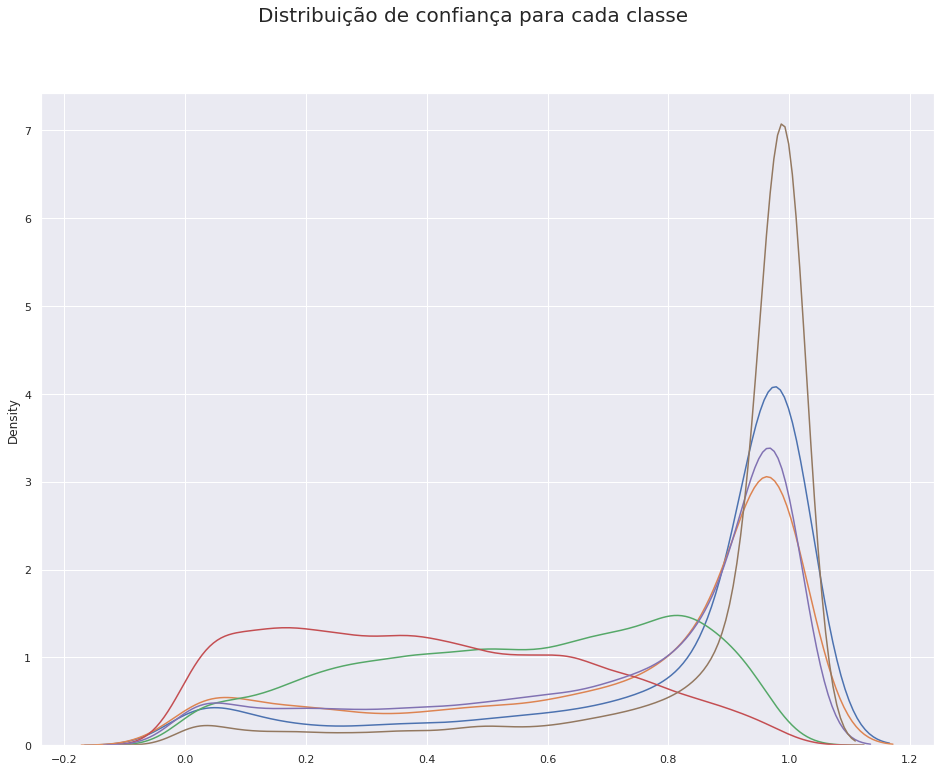

In [ ]:
g = best_lr
evaluate(ye_test, g.predict(x_test), g.predict_proba(x_test), labels=label_enc.classes_)

**Pergunta (1pt):** considerando o gráfico de distribuição de confiança para o seu modelo treinado, as amostras são classificadas com alta confiança? Há uma grande diferença de confiança entre as diferentes classes?

**Resposta:** Para o modelo de regressão logística treinado com otimização dos hiperparâmetros com GridSearch obteve-se uma acurácia balanceada de ~0.75, o que é consideravelmente alto. Avaliando a matriz de confusão relativa, nota-se que o modelo se confundiu a categoria 'Bank account or service' com 'Credit card' o que é razoável, dado que em alguns bancos o cartão de crédito pode ser entendido como um serviço. Outro ponto é a taxa de erro elevada para as categorias 'Credit reporting' e 'Credit reporting, credit repair services , ...' o que pode ser entendido pelo fato das duas categorias serem muito parecidas e possivelmente sobrepostas. Outras categorias como 'Debt collection' e 'Mortgage' foram preditas com uma alta taxa de acurácia. 

---



----------
----------

## Redes Neurais
Iremos treinar alguns modelos de redes neurais, variando número de camadas e quantidade de neurônios em cada camada.

In [ ]:
epochs = 30
batch_size = 128
input_shape = [features]

Vamos converter os rótulos em vetores *One Hot Encoded*:

In [ ]:
from keras.utils import np_utils
y_ohe_train = np_utils.to_categorical(ye_train, num_classes=6)
y_ohe_test = np_utils.to_categorical(ye_test, num_classes=6)

**Atividade (1 pt):** defina uma arquitetura de uma rede neural capaz de classificar os diferentes produtos a partir da conversa dos clientes. Compile a sua rede com a loss `categorical_crossentropy`, optimizador `SGD` e defina as métricas relevantes para o problema. 

In [ ]:
class ProductClassifier:
    
    def __init__(self, input_shape, checkpoint_path):
        self.activation = 'relu'
        self.kernel_initializer = 'glorot_uniform'
        self.input_shape = input_shape
        self.optimizer='SGD'
        self.loss= 'categorical_crossentropy'
        self.checkpoint_path = checkpoint_path


    def create_neural_network(self, neurons_per_layer, num_classes, layer_dropout = None, dropout_value = None, regularization = None):

        tf.random.set_seed(42)
        model = keras.Sequential()

        for index, layer in enumerate(neurons_per_layer):
            
            model.add(keras.layers.Dense(
              layer,
              input_shape = self.input_shape,
              activation = self.activation,
              kernel_initializer = self.kernel_initializer,
              kernel_regularizer = regularization))
            
            if index == layer_dropout:
              model.add(keras.layers.Dropout(dropout_value))

        model.add(keras.layers.Dense(num_classes, activation='softmax'))

       

        model.compile(optimizer= self.optimizer, loss= self.loss)

        self.model = model
    
    def train_model(self, x_data, y_data, epochs, batch_size,  x_val_data = None , y_val_data = None):
        
        self.model.fit( 
            x_data, 
            y_data, 
            validation_data = (x_val_data, y_val_data), 
            epochs = epochs, 
            batch_size = batch_size,
            callbacks = tf.keras.callbacks.ModelCheckpoint(filepath=self.checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1),
            shuffle = True
        )

    def predict(self, x_test):

      self.predict_proba = self.model.predict(x_test)
      self.predictions =  np.argmax(self.predict_proba, axis=1)

    def plot_loss(self):
      pd.DataFrame(self.model.history.history).plot()

### Treinando a rede neural

**Atividade (1 pt):** treine o modelo definido acima sobre o conjunto, respeitando as seguintes regras:

1. Separe um subconjunto do treino para validação.
2. Utilize alguma técnica para conservar os parâmetros que melhor generalizam o problema, como `ModelCheckpoint` (salve o modelo com nome de `weights.h5`).

In [ ]:
x_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(x_train.toarray(), y_ohe_train, test_size = 0.3)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(x_train_nn)

x_train_nn = std_scaler.transform(x_train_nn)
x_val_nn = std_scaler.transform(x_val_nn)

In [ ]:
baseline = ProductClassifier(input_shape = [features], checkpoint_path = '/content/checkouts_keras/')
baseline.create_neural_network([1024,528,64], num_classes = 6)

In [ ]:
baseline.model.summary()

In [ ]:
baseline.train_model(
    x_data = x_train_nn,
    y_data = y_train_nn, 
    epochs = epochs, 
    batch_size = batch_size,  
    x_val_data = x_val_nn, 
    y_val_data = y_val_nn)

In [ ]:
baseline.model.save('/content/weights.h5')
#baseline.model.load_weights('weights.h5')

O método `model.fit` retorna `model.history`, e contem algumas informações interessantes a respeito do histórico de treinamento.

**Atividade (1 pt):** plote um gráfico de linhas exibindo a evolução dos valores da função *loss* sobre o conjunto de treino e validação. A partir de qual `epoch` a rede começou a super-especializar?

**Resposta:** Para a rede neural proposta acima, notamos que a partir de aproximadamente 6 épocas a loss na validação começou a aumentar enquanto a do treino diminuir. Esse é um claro indicativo de overfitting, onde a rede começou a super-especializar no conjunto de treino e não consegue generalizar o suficiente para performar bem na validação.

In [ ]:
baseline.plot_loss()

### Avaliando o modelo treinado

**Atividade (1 pt):** teste o modelo treinado utilizando o subconjunto de teste. Reporte a acurácia para cada classe e a matriz de confusão percentual (usando a função `evaluate` definida anteriormente).

In [ ]:
x_test_nn = std_scaler.transform(x_test.toarray())

In [ ]:
baseline.predict(x_test_nn)

Accuracy: 0.73
Accuracy (balanced): 0.709


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

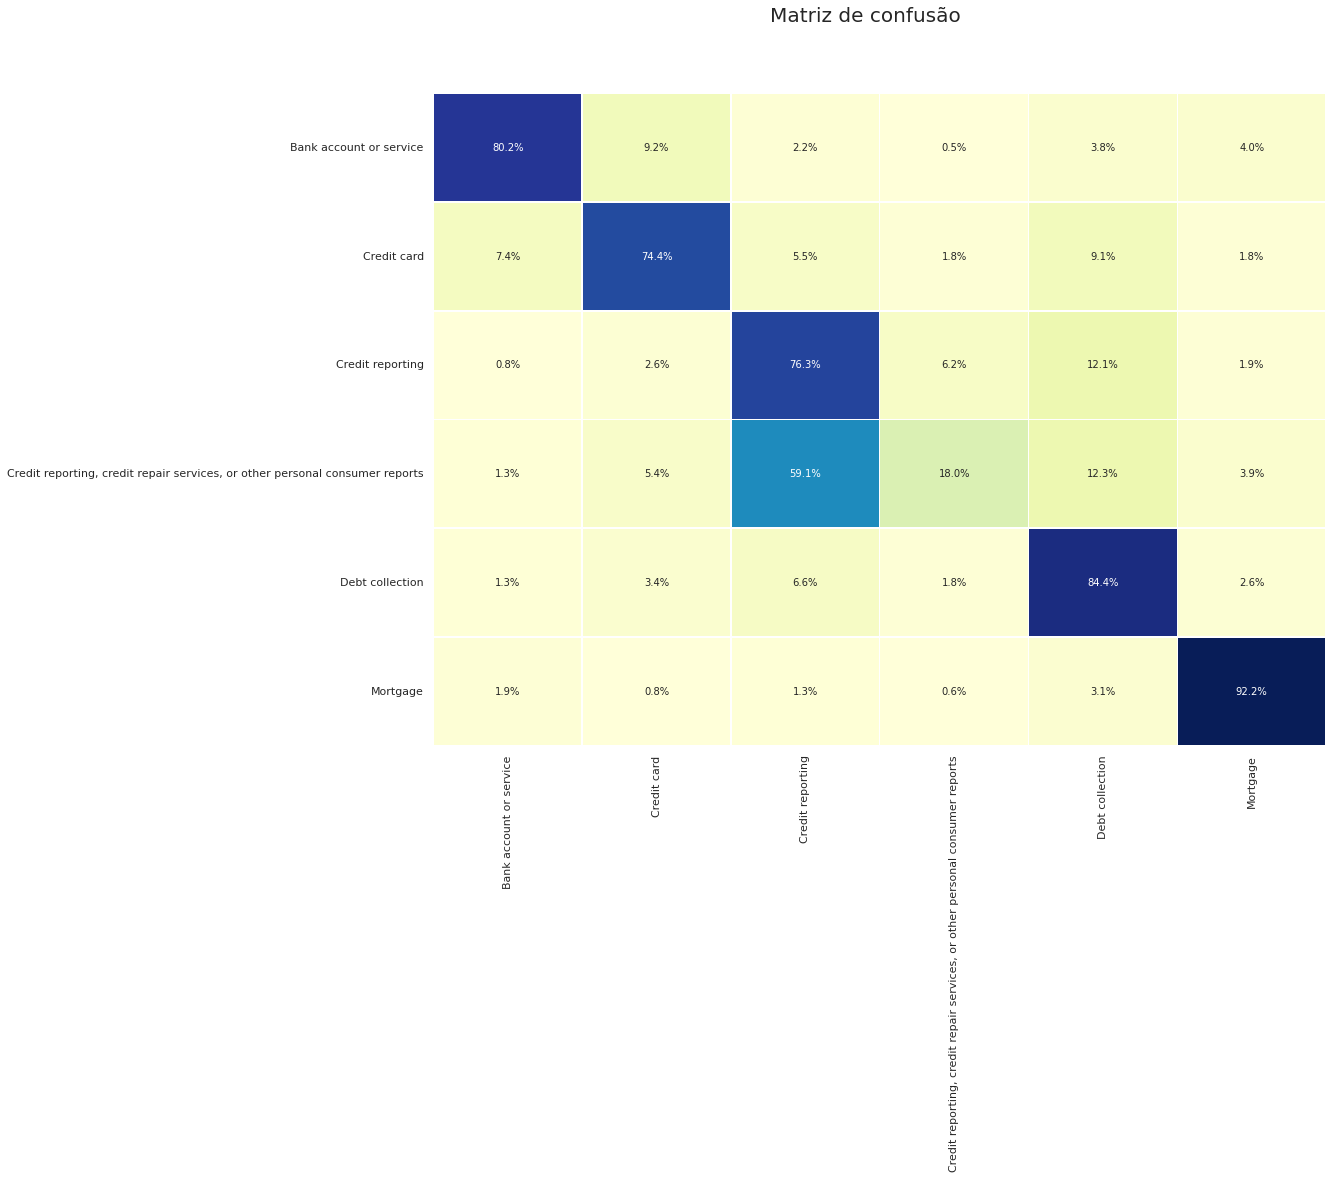

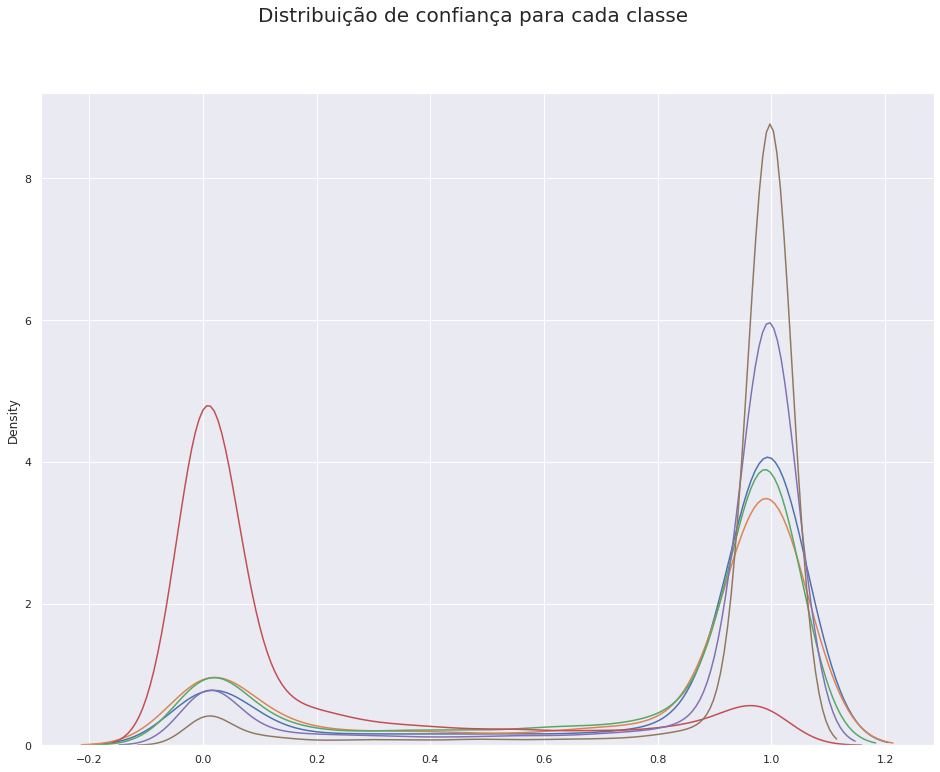

In [ ]:
evaluate(ye_test, baseline.predictions , baseline.predict_proba, labels=label_enc.classes_)

--------

Repita agora a definição, treinamento e avaliação de uma rede neural mais complexa, aumentando o número de camadas ou a quantidade de neurônios nas camadas da rede anterior:

**Atividade (1 pt):** defina uma rede neural mais complexa e a compile com as mesmas configurações da rede anterior.

In [ ]:
new_model = ProductClassifier(input_shape = [features], checkpoint_path = '/content/checkouts_keras_complex/')
new_model.create_neural_network([1024,1024,528,528,128], num_classes = 6)

In [ ]:
new_model.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 528)               541200    
_________________________________________________________________
dense_13 (Dense)             (None, 528)               279312    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               67712     
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 774       
Total params: 2,988,198
Trainable params: 2,988,198
Non-trainable params: 0
____________________________________________

**Atividade (1 pt):** treine a nova rede.

In [ ]:
new_model.train_model(
    x_data = x_train_nn,
    y_data = y_train_nn, 
    epochs = epochs, 
    batch_size = batch_size,  
    x_val_data = x_val_nn, 
    y_val_data = y_val_nn)

new_model.model.save('/content/weights_complex.h5')
#new_model.model.load_weights('weights_complex.h5')

Epoch 1/30
630/630 [==============================] - 6s 8ms/step - loss: 0.9893 - val_loss: 0.6537

Epoch 00001: val_loss improved from inf to 0.65375, saving model to /content/checkouts_keras_complex/
Epoch 2/30
630/630 [==============================] - 5s 8ms/step - loss: 0.5745 - val_loss: 0.5748

Epoch 00002: val_loss improved from 0.65375 to 0.57484, saving model to /content/checkouts_keras_complex/
Epoch 3/30
630/630 [==============================] - 5s 8ms/step - loss: 0.4948 - val_loss: 0.5564

Epoch 00003: val_loss improved from 0.57484 to 0.55637, saving model to /content/checkouts_keras_complex/
Epoch 4/30
630/630 [==============================] - 5s 8ms/step - loss: 0.4428 - val_loss: 0.5376

Epoch 00004: val_loss improved from 0.55637 to 0.53765, saving model to /content/checkouts_keras_complex/
Epoch 5/30
630/630 [==============================] - 5s 8ms/step - loss: 0.3988 - val_loss: 0.5349

Epoch 00005: val_loss improved from 0.53765 to 0.53488, saving model to /co

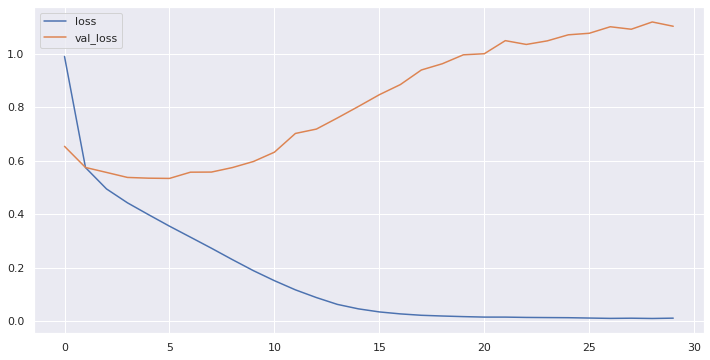

In [ ]:
new_model.plot_loss()

Observa-se um comportamento semelhante à rede anterior, onde com um número de épocas elevado o modelo fica especialista no conjunto de treino mas não consegue generalizar o suficiente para performar bem na validação

Accuracy: 0.725
Accuracy (balanced): 0.702


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

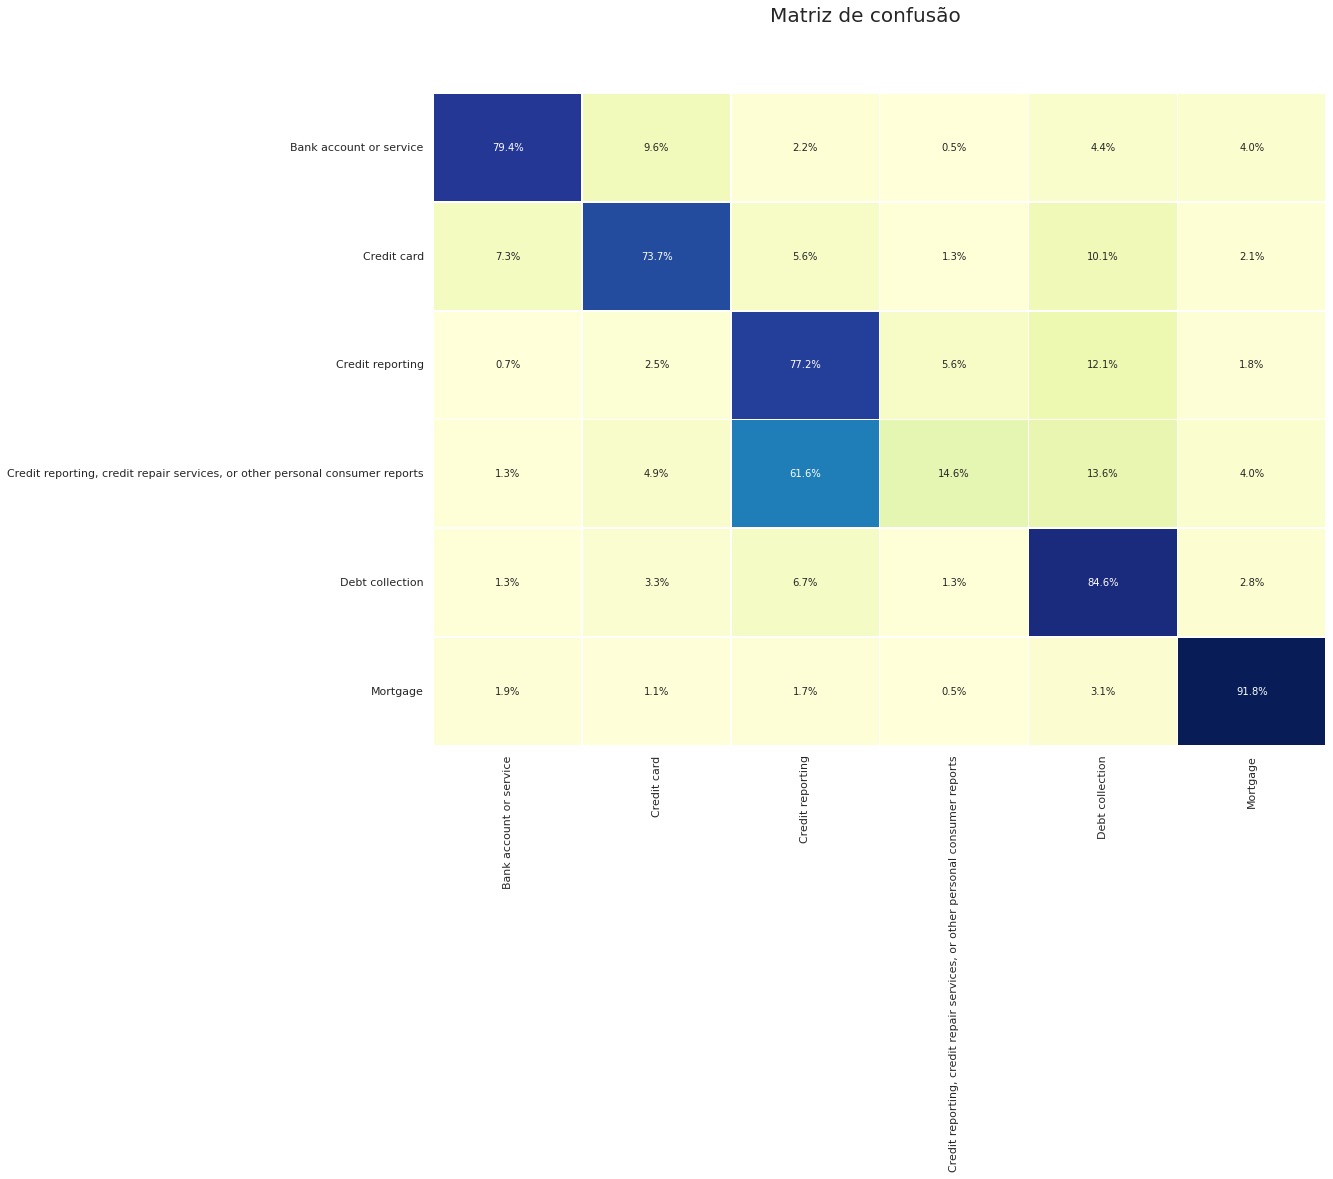

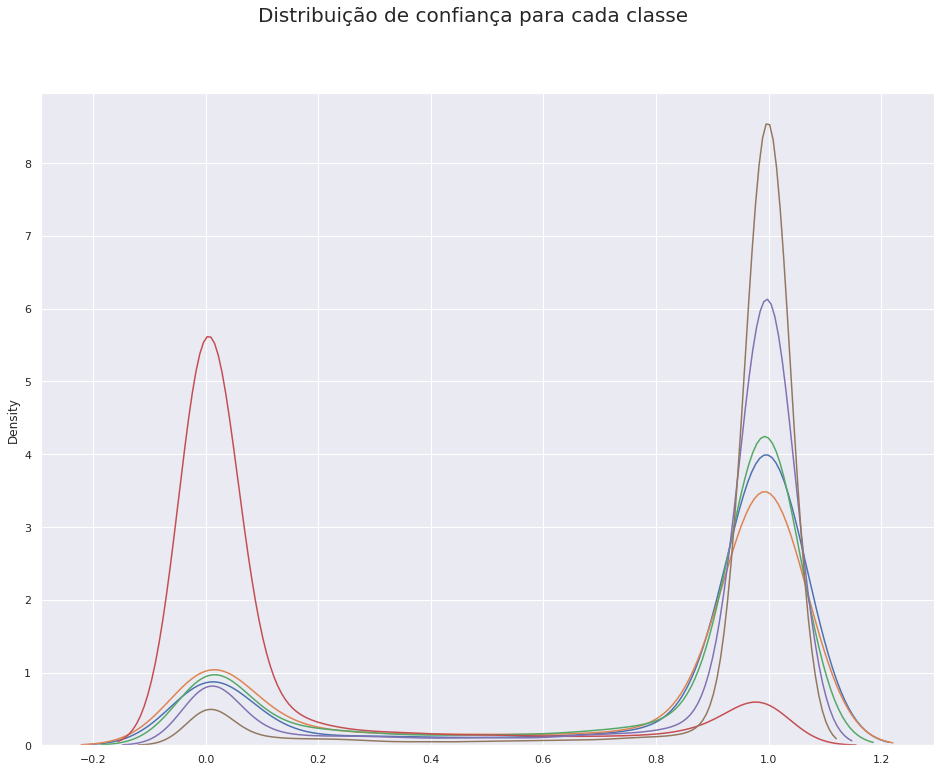

In [ ]:
new_model.predict(x_test_nn)

evaluate(ye_test, new_model.predictions , new_model.predict_proba, labels=label_enc.classes_)

**Atividade (1 pt):** adicione dropout ou regularização L1/L2 e treine o novo modelo. Se for, preciso, faça uma busca pelos hipeparâmetros da regularização/dropout.

In [ ]:
dropout_model = ProductClassifier(input_shape = [features], checkpoint_path = '/content/checkouts_keras_dropout/')
dropout_model.create_neural_network([1024,1024,1024,528,128], num_classes = 6, layer_dropout = 3, dropout_value = 0.4, regularization = keras.regularizers.l2(0.01))

In [ ]:
dropout_model.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_33 (Dense)             (None, 528)               541200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 528)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               67712     
_________________________________________________________________
dense_35 (Dense)             (None, 6)                

In [ ]:
dropout_model.train_model(
    x_data = x_train_nn,
    y_data = y_train_nn, 
    epochs = epochs, 
    batch_size = batch_size,  
    x_val_data = x_val_nn, 
    y_val_data = y_val_nn)

dropout_model.model.save('/content/weights_dropout.h5')
#dropout_model.model.load_weights('weights_dropout.h5')

Epoch 1/30
630/630 [==============================] - 6s 9ms/step - loss: 36.2596 - val_loss: 31.6082

Epoch 00001: val_loss improved from inf to 31.60821, saving model to /content/checkouts_keras_dropout/
Epoch 2/30
630/630 [==============================] - 5s 8ms/step - loss: 28.0050 - val_loss: 24.6707

Epoch 00002: val_loss improved from 31.60821 to 24.67070, saving model to /content/checkouts_keras_dropout/
Epoch 3/30
630/630 [==============================] - 5s 8ms/step - loss: 21.8759 - val_loss: 19.3270

Epoch 00003: val_loss improved from 24.67070 to 19.32702, saving model to /content/checkouts_keras_dropout/
Epoch 4/30
630/630 [==============================] - 5s 8ms/step - loss: 17.1386 - val_loss: 15.1797

Epoch 00004: val_loss improved from 19.32702 to 15.17966, saving model to /content/checkouts_keras_dropout/
Epoch 5/30
630/630 [==============================] - 5s 8ms/step - loss: 13.4661 - val_loss: 11.9656

Epoch 00005: val_loss improved from 15.17966 to 11.96563, 

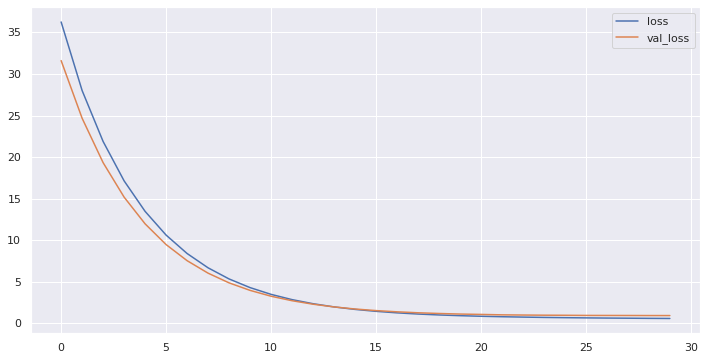

In [ ]:
dropout_model.plot_loss()

Accuracy: 0.744
Accuracy (balanced): 0.721


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

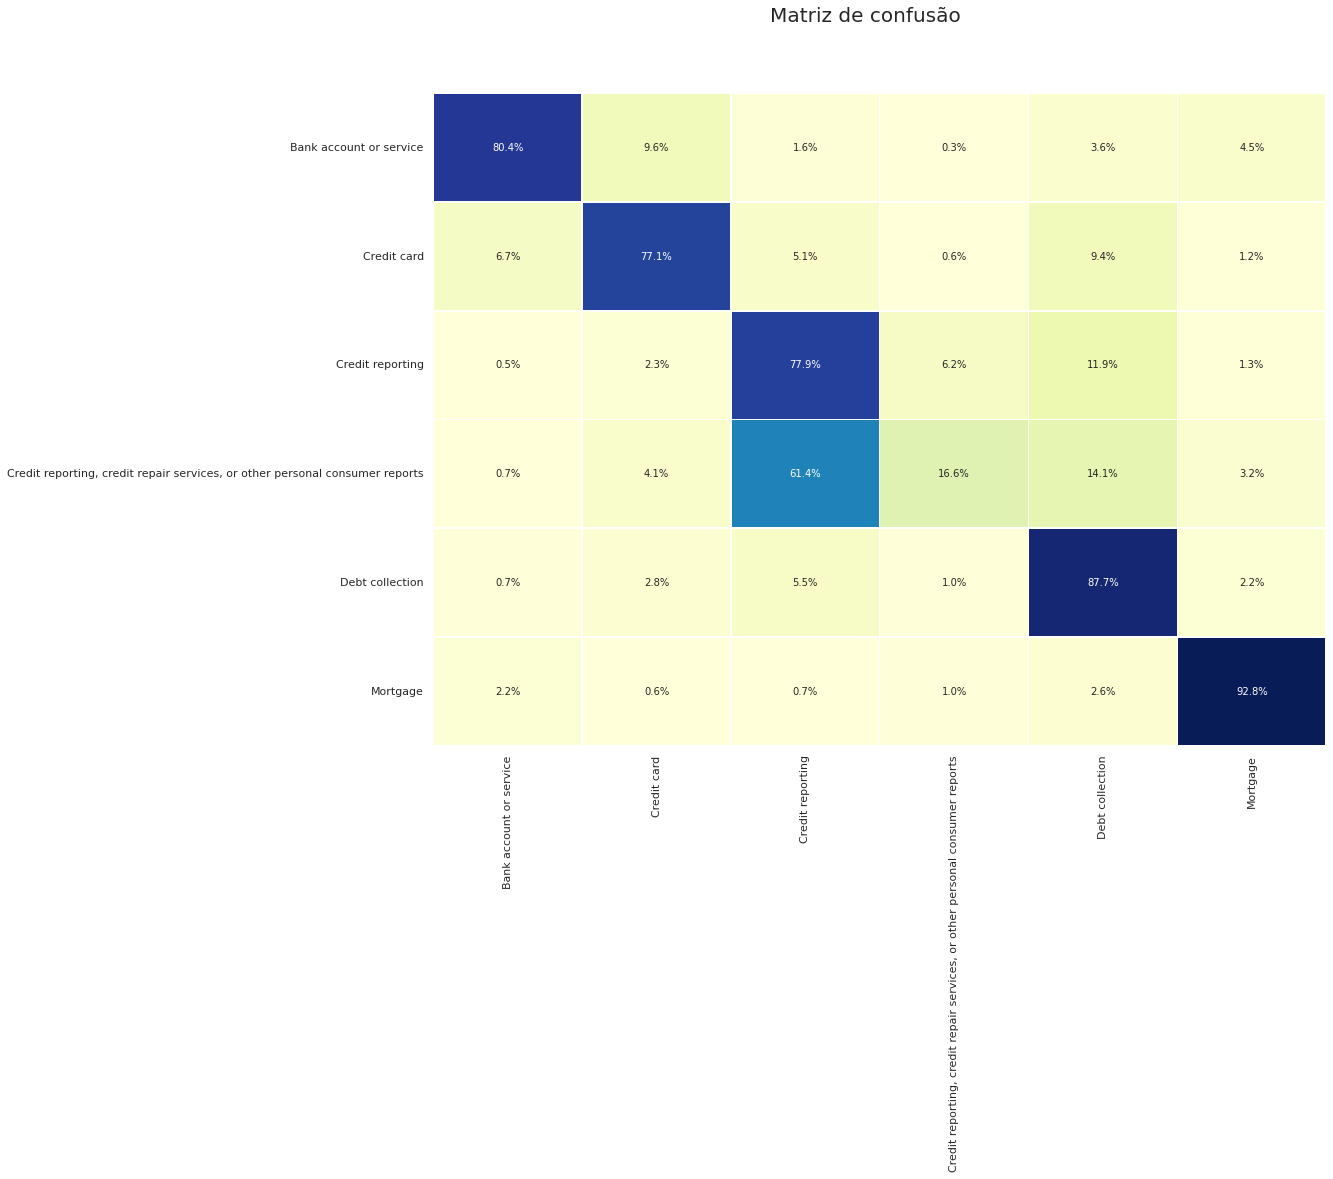

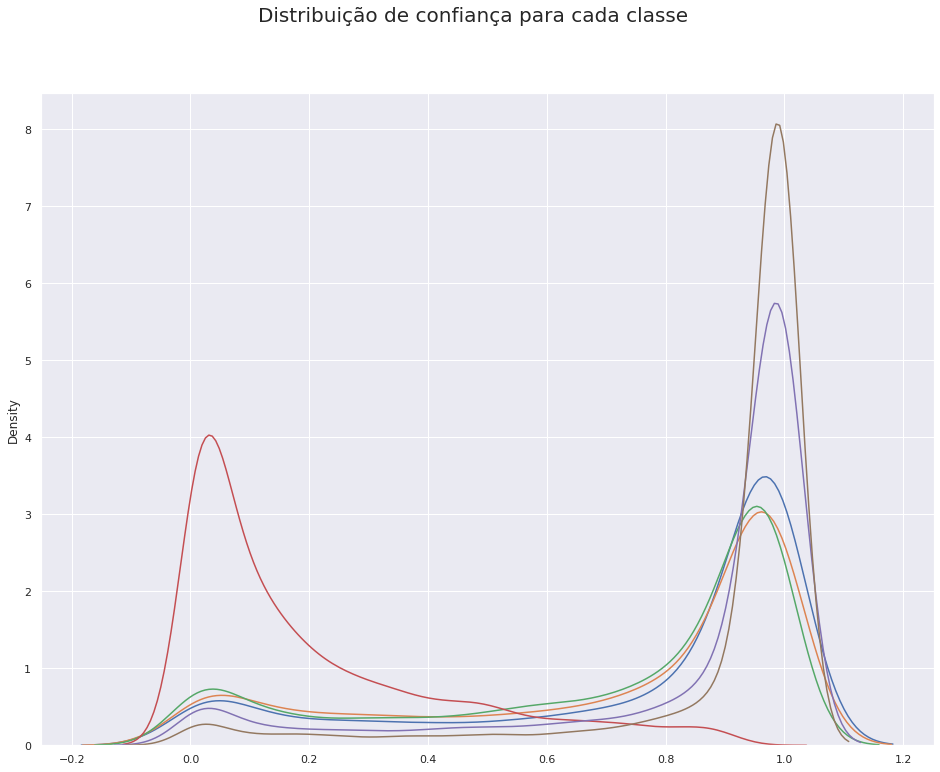

In [ ]:
dropout_model.predict(x_test_nn)

evaluate(ye_test, dropout_model.predictions , dropout_model.predict_proba, labels=label_enc.classes_)

**Atividade (1 pt):** avalie os modelos treinados e compare com os resultados anteriores.

**Resposta:** Nota-se que os modelos inicialmente treinados se tornaram especialistas no conjunto de treino, onde após determinada época a função de custo na validação crescia enquanto a do treino diminuia. Quando foram incorporadas técnicas de generalização como dropout e regularização L2 notou-se que o modelo apresentou uma queda considerável tanto na loss da validação como na do treino indicando melhor capacidade de abstração. Entretanto, quando comparamos com uma regressão logística notamos que a rede neural performa pior que o modelo anterior, principalmente em questão de 'Credit Reporting' e 'Credit Reporting, credit repair services, ...'. Acreditamos com melhores parâmetros seja possível encontrar uma rede neural que performe melhor, entretanto devido ao custo computacional elevado e talvez a necessidade de mais amostras optaríamos pela regressão logística